# Final DSCI 100 Project

## Predicting Subscription Status Based on Age and Playtime

This is the final DSCI 100 project, working on predicting a player's subscription status based on the amount of hours spent playing UBC's *MineCraft* and their age.

## 1. Introduction

## 2. Method and Results

In [2]:
#Load in tidyverse library
library(tidyverse)
#Reads in players.csv from a url so it is reproducible always
players <- read_csv("https://raw.githubusercontent.com/strikerjoseph734-glitch/individual_planning_project/refs/heads/main/Data/players.csv")

head(players, n = 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


Now to select desired variables and wrangle them:

In [10]:
players_wrangled <- players |> 
    #Selects desired columns
    select(subscribe, played_hours, Age) |>
    #Filters for values (gets rid of N/A)
    filter(!is.na(played_hours), !is.na(Age),!is.na(subscribe))|>
    #Converts subscribe into a factor
    mutate(subscribe = factor(subscribe))
    
#Displays the first 10 rows of the dataframe
head(players_wrangled, 10)


subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
FALSE,0.0,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.0,17
TRUE,0.0,19
FALSE,0.0,21
TRUE,0.1,47


Now our data has been wrangled, let's calculate our summary statistics:

In [33]:
#Counts number of rows (# of players) in the wrangled data
player_count <- count(players_wrangled, name = "player_count")
player_count

#Summarise to calculate summary statistics for age and hours played
age_summary <- players_wrangled |>
    summarise(mean_age = round(mean(Age), 2),
              median_age = median(Age),
              min_age = min(Age),
              max_age = max(Age),
              stdev = sd(Age),
              )
age_summary

hours_summary <- players_wrangled |>
    summarise(mean_played_hours = round(mean(played_hours), 2),
            median_played_hours = median(played_hours),
            min_played_hours = min(played_hours),
            max_played_hours = max(played_hours),
            stdev = sd(played_hours),
            )
hours_summary

#Percent proportions of those subscribed and not subscribed
subscribe_pct <- players_wrangled |>
  count(subscribe) |>
  mutate(percentage = round(n / sum(n) * 100, 2))|>
  rename(number = n)

subscribe_pct

player_count
<int>
194


mean_age,median_age,min_age,max_age,stdev
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.14,19,9,58,7.389687


mean_played_hours,median_played_hours,min_played_hours,max_played_hours,stdev
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5.9,0.1,0,223.1,28.49793


subscribe,number,percentage
<fct>,<int>,<dbl>
FALSE,52,26.8
TRUE,142,73.2


Now we have summarized our data, it is important to visualize it in order to view any potential trends. Because two numeric variables are being compared, a **scatter plot** will be used, with the colour of the point indicating whether a player has subscribed or not. 

Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_point()`).”


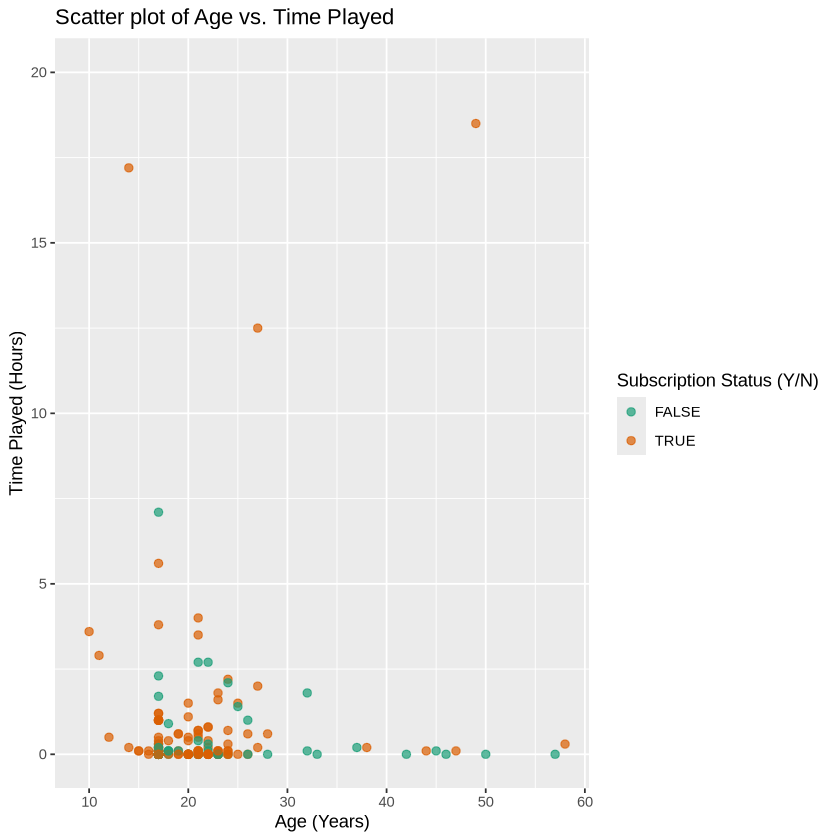

In [32]:
#Imports R Color Brewer library to colour the points
library(RColorBrewer)

hours_age_plot <- players_wrangled |> ggplot(aes(x = Age, y = played_hours, color = subscribe))+
    #Sets transparency for better visibility
    geom_point(alpha = 0.7, size = 2)+
    #Sets color palette as Dark2
    scale_color_brewer(palette = "Dark2")+
    #Axes, legend, graph titles
    labs(title = "Scatter plot of Age vs. Time Played",
         x = "Age (Years)",
         y = "Time Played (Hours)",
         color = "Subscription Status (Y/N)"
         )+
    #Sets a limit on the Y-axis to get rid of outliers and to get a better visualization of the graph
    ylim(0,20)

hours_age_plot

After limiting the Y-axis to remove outlier values, it appears that both subscribed and non-subscribed players tend to be quite young and have low playtimes. It is also clear that the majority of players are subscribed, meaning that to build an accurate predictive model, upsampling on non-subscribed players will be needed.